In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
from keras.preprocessing import image,sequence
from keras.applications import InceptionV3
from keras.layers import Dense,Convolution2D,Embedding,Dropout,LSTM,TimeDistributed,Bidirectional,Activation,RepeatVector,Merge,Flatten
from keras.optimizers import Adam, RMSprop,Nadam
from keras.models import Sequential, Model
import nltk
import glob
from PIL import Image
%matplotlib inline
import pickle
from tqdm import tqdm

In [3]:
images_dir = os.listdir("./Flickr8k_Dataset/Flicker8k_Dataset/")

images_path = './Flickr8k_Dataset/Flicker8k_Dataset/'
captions_path = './Flickr8k_text/Flickr8k.token.txt'
train_path = './Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = './Flickr8k_text/Flickr_8k.devImages.txt'

In [ ]:
captions = open(captions_path,'r').read().strip().split('\n')
x_train = open(train_path,'r').read().strip().split('\n')
x_val = open(val_path,'r').read().strip().split('\n')

In [5]:
################################################
temp = captions[20].split('#')
print(temp[0])#img_name
print(temp)
temp[1][2:]#text
###############################################

1007129816_e794419615.jpg
['1007129816_e794419615.jpg', '0\tA man in an orange hat starring at something .']


'A man in an orange hat starring at something .'

In [15]:
def preprocessing():
    captions_path = './Flickr8k_text/Flickr8k.token.txt'
    captions = open(captions_path,'r').read().strip().split('\n')
    tokens = {}
    for i in range (len(captions)):
        temp = captions[i].split('#')
        if temp[0] in tokens:
            tokens[temp[0]].append(temp[1][2:])
        else:
            tokens[temp[0]] = [temp[1][2:]]

    train_imgs = open("./Flickr8k_text/Flickr_8k.trainImages.txt").read().split('\n')[:-1]
    train_dataset = open('./Flickr8k_text/flickr_8k_train_dataset.txt','w')
    train_dataset.write("image_id\tcaptions\n")
    train_encoded_images = {}

    c_train = 0
    for img in train_imgs:
        train_encoded_images[img] = get_encoding(inception, img)
        for caption in tokens[img]:
            capt = "<start> "+caption+" <end>"
            train_dataset.write(img+"\t"+capt+"\n")
            train_dataset.flush()
            c_train +=1
    train_dataset.close()
    with open( "train_encoded_images.p", "wb" ) as pickle_f:
        pickle.dump(train_encoded_images, pickle_f ) 


    val_imgs = open('./Flickr8k_text/Flickr_8k.devImages.txt').read().split('\n')[:-1] 
    val_dataset = open('./Flickr8k_text/flickr_8k_val_dataset.txt','w')
    val_dataset.write("image_id\tcaptions\n")
    val_encoded_images = {}
    c_test = 0
    for img in val_imgs:
        val_encoded_images[img] = get_encoding(inception, img)
        for caption in tokens[img]:
            capt = "<start> "+caption+" <end>"
            val_dataset.write(img+"\t"+capt+"\n")
            val_dataset.flush()  
            c_test +=1
    val_dataset.close()

    with open( "val_encoded_images.p", "wb" ) as pickle_f:
        pickle.dump(val_encoded_images, pickle_f ) 
    with open("dict_tokens.p","wb") as pickle_f:
        pickle.dump(tokens,pickle_f)

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=True, input_shape=(224,224,3))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
inception.summary()

In [9]:
def preprocess_image(img):
    img = img[:, :, :, ::-1] #RGB to BGR
    img[:, :, :, 0] -= 103.939 
    img[:, :, :, 1] -= 116.779
    img[:, :, :, 2] -= 123.68
    return img

def  preprocess_vgg(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = preprocess_image(x)
    return x

In [10]:
x = preprocess_vgg(images_path+temp[0])
print(x.shape)

(1, 224, 224, 3)


In [ ]:
inception = Model(inputs=inception.input, outputs=inception.layers[-2].output)

In [ ]:
incep

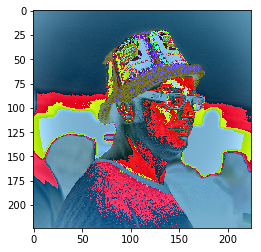

In [12]:
plt.figure(0)
plt.imshow(np.squeeze(x, axis=0))
plt.show()

In [13]:
def get_encoding(model, img):
    image = preprocess_vgg(images_path+img)
    pred = model.predict(image)
    pred = np.reshape(pred, pred.shape[1])
    return pred


In [16]:
preprocessing()